In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as pth
import seaborn as sns
from astropy.stats import RipleysKEstimator
import sklearn.neighbors as sn
from shapely.geometry import Polygon
from itertools import compress
pd.options.display.max_colwidth=300
sns.set(style="white", context="poster")
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

In [4]:
coord01=pd.read_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01CB_4_RoiCoord.txt',
                   header='infer', sep='\t')             
n=len(coord01.loc[coord01['Channel Name']=='405/647'])
n

924

In [8]:
xx=coord01.loc[coord01['Channel Name']=='405/647']['X']
yy=coord01.loc[coord01['Channel Name']=='405/647']['Y']

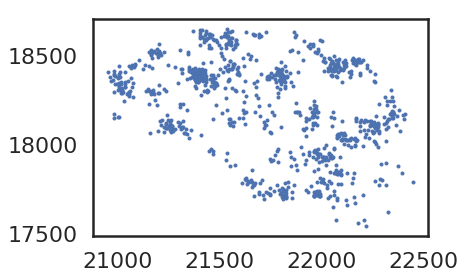

In [9]:
plt.plot(xx,yy, "bo", markersize=3)

In [10]:
coord01.head(2)

Channel Name  Unnamed: 0        X        Y       Xc       Yc      Height  \
0      405/561      104738  22364.5  17864.6  22397.4  17841.1  1777.57483   
1      405/561      105030  22368.1  17768.3  22401.1  17744.7  1532.76855   

          Area      Width      Phi   ...        Photons  \
0  21988.49219  328.10428  0.18559   ...     2891.48672   
1  10738.23535  339.43060  0.58815   ...     1412.07795   

   Lateral Localization Accuracy       Xw       Yw      Xwc      Ywc  \
0                       16.80739  22364.5  17864.6  22397.4  17841.1   
1                       25.42124  22368.1  17768.3  22401.1  17744.7   

   Unnamed: 0.1  Zw  Zwc  IN_poly  
0           NaN NaN  NaN     True  
1           NaN NaN  NaN     True  

[2 rows x 29 columns]

In [11]:
real=list(zip(xx, yy))
real

[(22325.7, 18100.4),
 (22343.9, 18193.2),
 (21514.8, 18409.4),
 (21294.2, 18350.2),
 (22096.4, 18069.8),
 (22324.7, 17624.6),
 (21621.7, 18118.8),
 (21873.2, 17889.8),
 (22059.1, 17740.1),
 (21555.4, 18562.8),
 (22215.7, 17543.2),
 (21197.3, 18494.3),
 (21718.2, 17695.6),
 (22355.8, 18221.1),
 (22268.0, 18110.4),
 (21652.2, 18499.4),
 (21629.6, 18273.6),
 (22009.0, 17789.0),
 (21545.1, 18570.0),
 (22276.9, 18118.7),
 (21976.2, 18113.1),
 (21438.4, 18295.8),
 (21556.5, 18580.4),
 (22373.4, 17881.0),
 (22234.4, 18039.0),
 (21437.7, 18311.7),
 (21385.1, 18356.3),
 (21456.8, 18466.0),
 (22152.3, 17817.7),
 (21923.9, 18094.7),
 (22319.7, 18222.9),
 (22075.9, 18441.6),
 (22081.3, 17783.8),
 (22033.9, 17796.7),
 (21526.4, 18320.5),
 (21577.4, 18573.6),
 (20982.7, 18153.0),
 (21001.9, 18158.7),
 (21006.5, 18158.7),
 (21433.2, 18596.4),
 (21415.3, 18357.7),
 (22100.9, 18351.4),
 (21573.9, 18559.5),
 (21562.4, 18442.6),
 (21405.3, 18417.4),
 (22316.1, 18021.3),
 (22315.1, 18089.9),
 (21810.6, 17

In [17]:
attr01=pd.read_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt', 
                    header='infer', sep='\t')
vtx=list(zip(attr01['x'], attr01['y']))
vtx

[(21957.1334504, 17381.2473132),
 (21956.6220603, 17385.6391563),
 (21874.0625046, 17467.7983862),
 (21792.5446935, 17551.258496000002),
 (21709.8171574, 17633.578128),
 (21604.9303381, 17693.750463900004),
 (21540.1602511, 17794.041253),
 (21393.4315076, 17812.373615200002),
 (21266.229492, 17850.2329888),
 (21192.618132, 17941.6859588),
 (21108.104797699998, 18022.2655392),
 (21022.6405278, 18102.1441978),
 (20939.089734999998, 18185.9325787),
 (20905.2939854, 18334.954457599997),
 (20989.083559799998, 18412.201338799998),
 (21070.373404700003, 18495.558067500002),
 (21153.4592612, 18577.493910499998),
 (21313.582103599998, 18582.428526599997),
 (21394.863397, 18666.2229188),
 (21480.810191, 18745.6321568),
 (21647.161659999998, 18748.268608099996),
 (21723.049923599996, 18659.4199825),
 (21894.3888074, 18665.7507928),
 (22065.8922142, 18672.200136099997),
 (22142.4648403, 18583.7124244),
 (22227.0057001, 18503.192305599998),
 (22312.7234829, 18423.8498338),
 (22398.3280884, 18344.40

In [18]:
xlow=attr01.x.min()
xhigh=attr01.x.max()
ylow=attr01.y.min()
yhigh=attr01.y.max()

In [19]:
zx=np.random.uniform(low=xlow, high=xhigh, size=n)
zy=np.random.uniform(low=ylow, high=yhigh, size=n)
zxy=list(zip(zx,zy))
len(zxy)

924

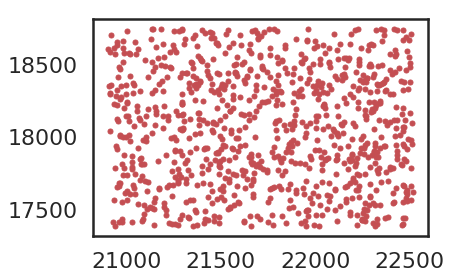

In [20]:
plt.plot(zx, zy, 'ro', markersize=5)

In [21]:
contain=pth.Path(vtx).contains_points(zxy)
filtered=list(compress(zxy, contain))
ins=len(filtered)
ins

607

In [22]:
len(zxy)

924

In [169]:
# zx1=np.random.uniform(low=xlow, high=xhigh, size=(n-ins))
# zy1=np.random.uniform(low=ylow, high=yhigh, size=(n-ins))
# zxy1=list(zip(zx1,zy1))
# zxy=zxy+zxy1
# print(len(zxy))
# print(len(zxy1))

1110
290


In [23]:
while ins<n:
    zx1=np.random.uniform(low=xlow, high=xhigh, size=(n-ins))
    zy1=np.random.uniform(low=ylow, high=yhigh, size=(n-ins))
    zxy1=list(zip(zx1,zy1))
    zxy=zxy+zxy1
#     print(zxy)/
    contain=pth.Path(vtx).contains_points(zxy)
    filtered=list(compress(zxy, contain))
    ins=len(filtered)

In [24]:
print(n, ins, sep="\n")

924
924


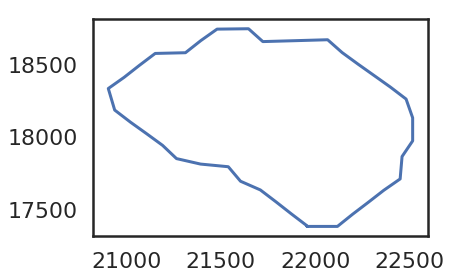

In [25]:
plt.plot(attr01['x'], attr01['y'])

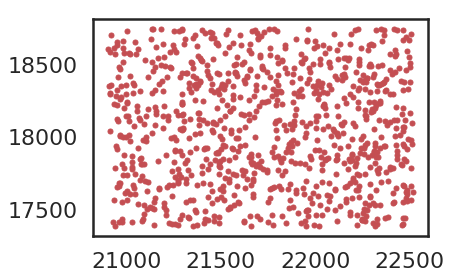

In [26]:
plt.plot(zx, zy, 'ro', markersize=5)

In [27]:
fx,fy=zip(*filtered)
fx

(22430.380749764765,
 21388.332512180194,
 21522.884822727596,
 22234.041468208845,
 21333.64668949074,
 21946.804290286527,
 21778.073972165264,
 21285.5444273298,
 22035.10815785166,
 22153.534330170536,
 21385.915704591313,
 21505.32700098678,
 22158.521306302333,
 21658.204328959004,
 21805.137063198854,
 22015.98056034404,
 21697.049537686624,
 21579.410732572556,
 22334.045545967296,
 21555.94791180418,
 21588.00851024897,
 21301.124539609245,
 21790.086707291386,
 22316.281129842482,
 21485.090600598414,
 22064.96614400473,
 22255.193858942264,
 22004.590769201317,
 22195.12117534922,
 21968.95062010509,
 21301.32039346897,
 21983.03543309019,
 22149.612858628043,
 22485.99747313303,
 22026.38618340057,
 21356.79618581583,
 22013.806503615706,
 22329.193798917757,
 21541.95605429645,
 21686.1269038665,
 22111.533143310895,
 21519.324294371974,
 22182.91690235457,
 22117.812386873484,
 22049.669651061522,
 21502.593226025307,
 21670.016802306956,
 21888.055364433534,
 22425.12102

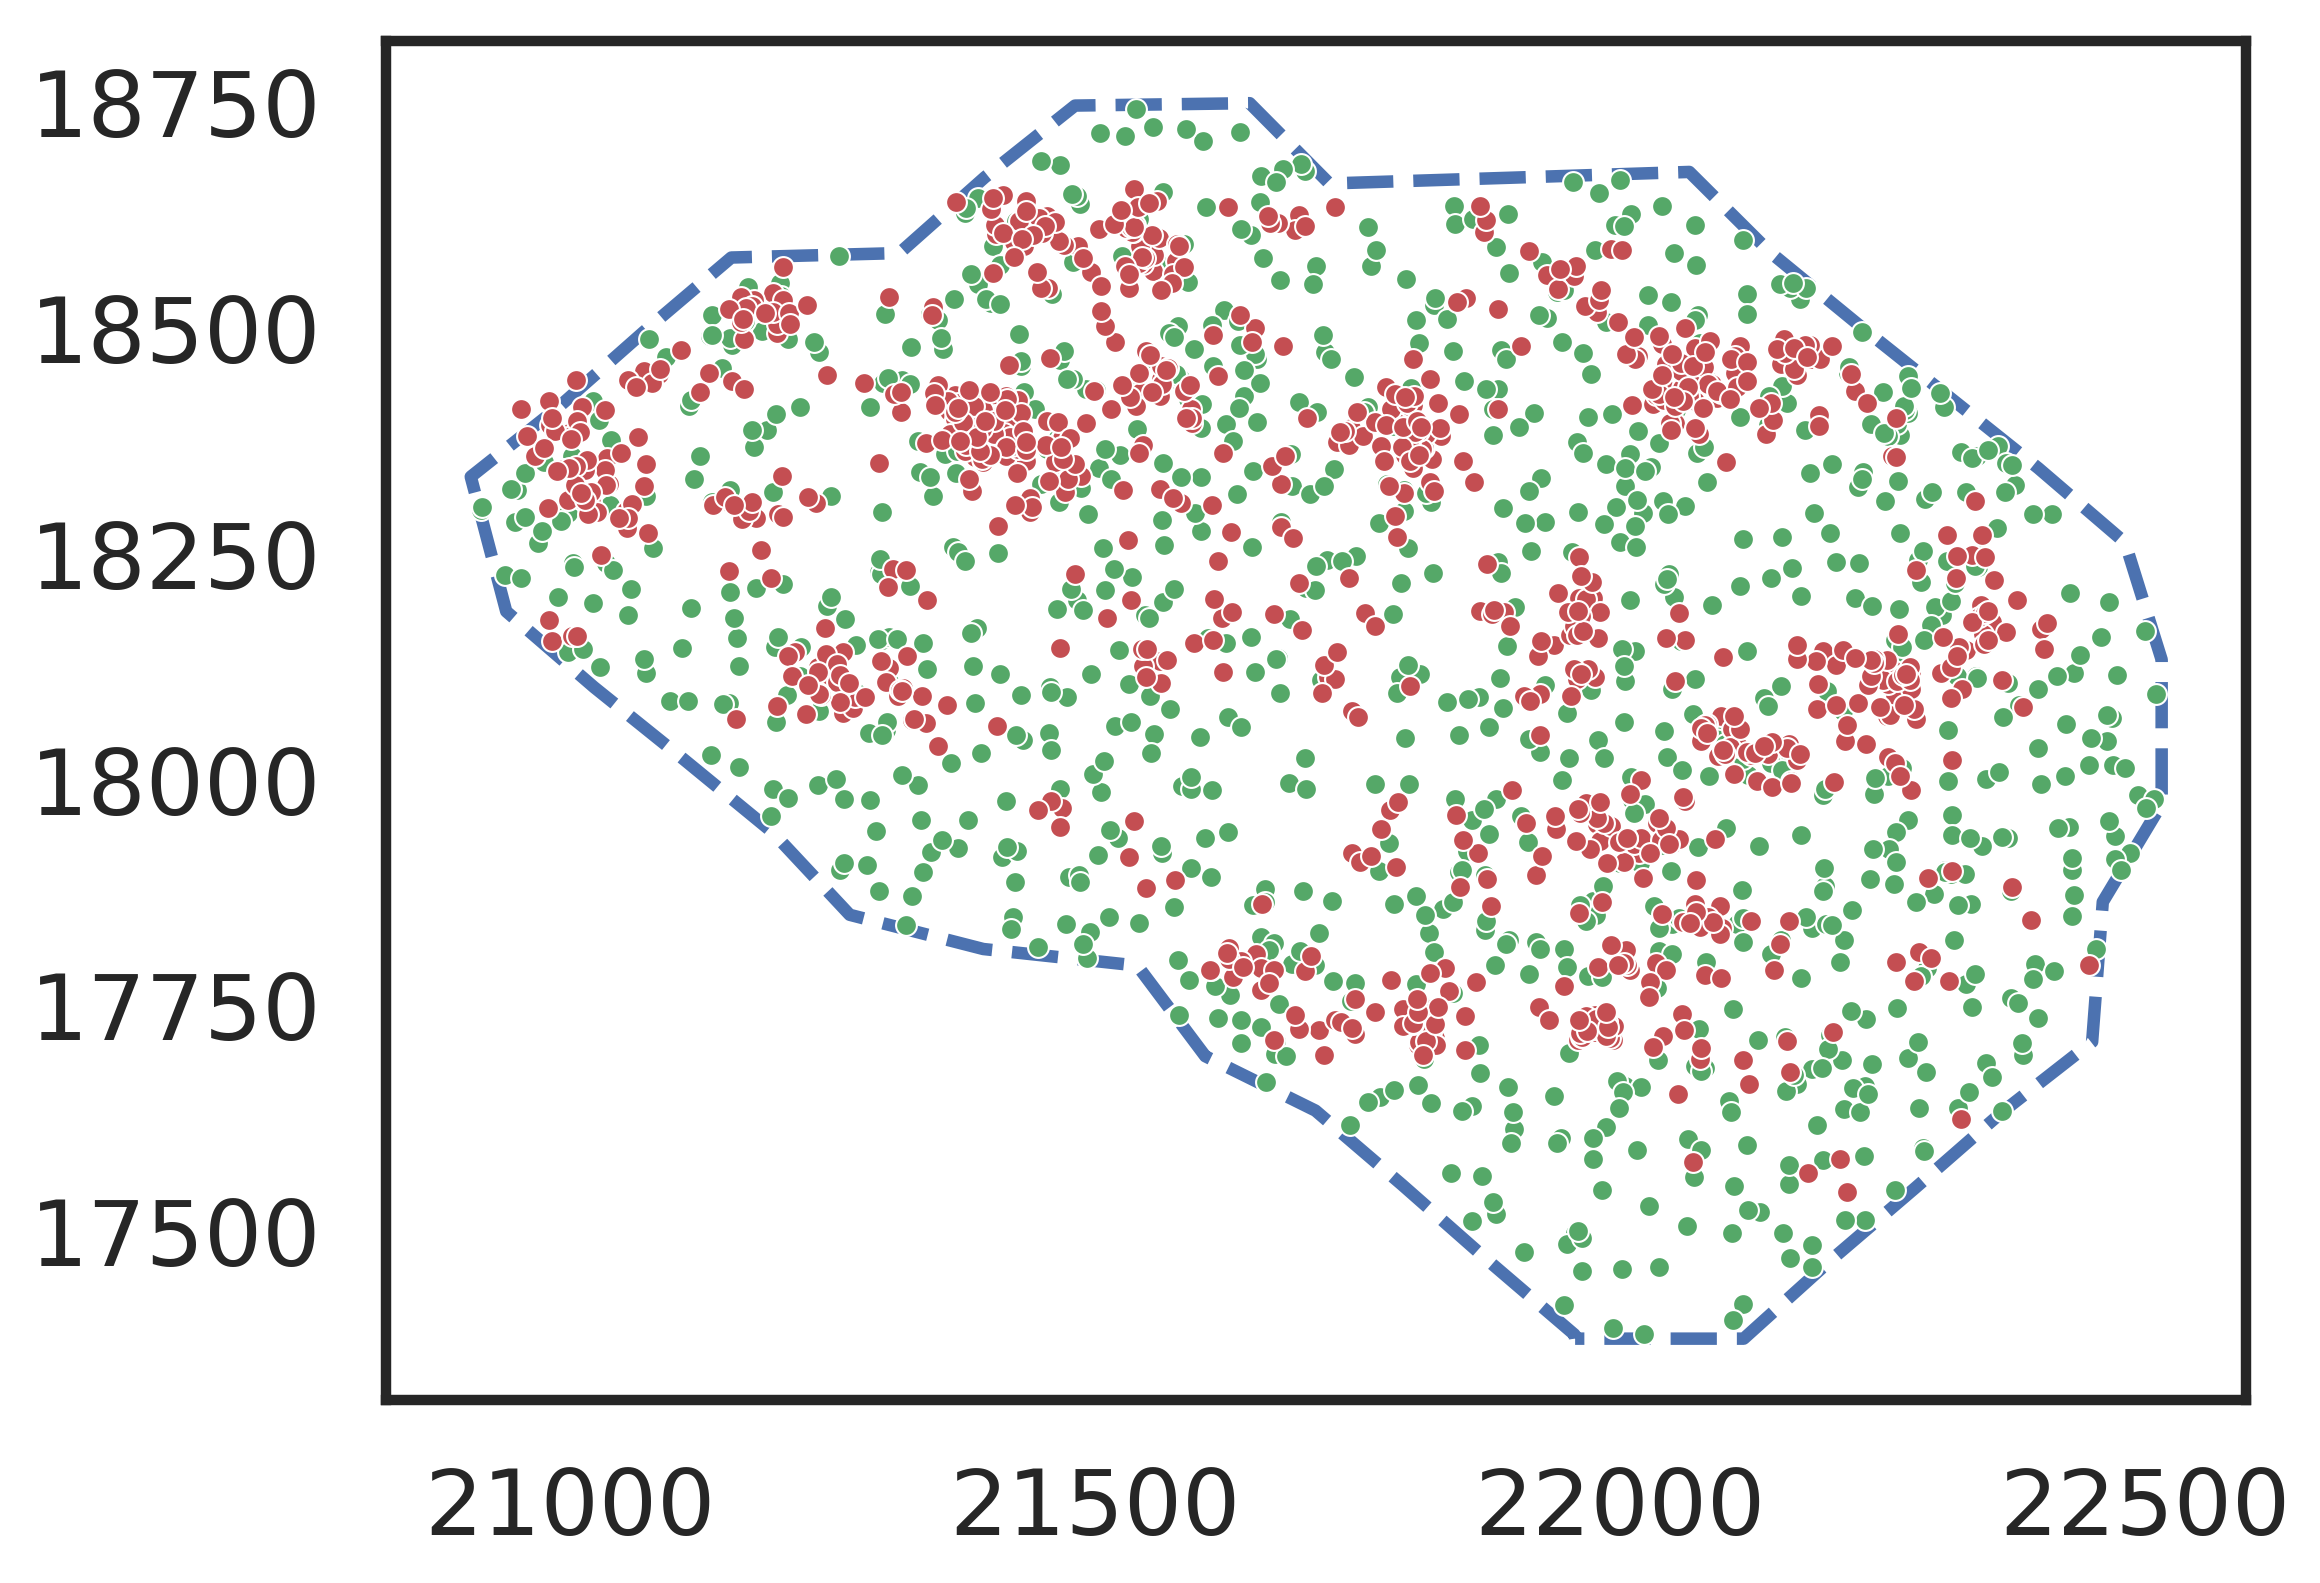

In [28]:
plt.figure(figsize=(8,6), dpi=300)
plt.plot(attr01['x'], attr01['y'], 'b--')
plt.plot(fx,fy, 'go', markersize=5, markeredgecolor="w", markeredgewidth=0.5)
plt.plot(xx,yy, 'ro', markersize=5, markeredgecolor="w", markeredgewidth=0.5)

In [29]:
def polygon_area(path):
    '''
Reads a coordinate file and returns a  polygon.
Needs  shapely
'''
    df=pd.read_csv(path, sep='\t', header='infer')
    roizip=zip(df.x, df.y)
    roilist=list(roizip)
    polyarea=Polygon(roilist).area
    return polyarea

In [31]:
pr=polygon_area('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt')
pr

1383649.9401110257

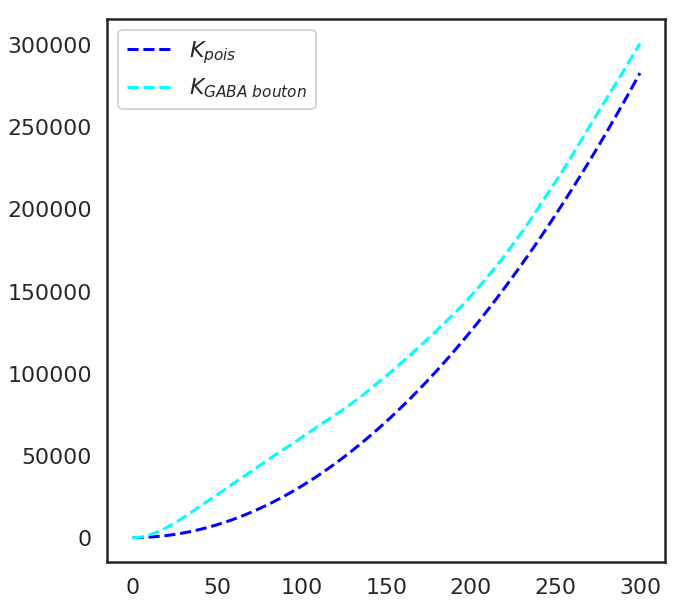

In [38]:
plt.figure(figsize=(10,10))
r=np.linspace(0,300,100)
Kest=RipleysKEstimator(area=pr, x_min=xlow, x_max=xhigh, y_min=ylow, y_max=yhigh)
plt.plot(r, Kest.poisson(r), color='blue', ls='--', label=r'$K_{pois}$')
# plt.plot(r, Kest(data=filtered, radii=r, mode='ripley'), color='red', ls='--', label=r'$K_{uniform}$')
plt.plot(r, Kest(data=real, radii=r, mode='ripley'), color='cyan', ls='--', label=r'$K_{GABA\ bouton}$')
# plt.plot(r, Kest(data=real, radii=r, mode='none'), color='yellow', ls='--',
#          label=r'$K_{un}$')
# plt.plot(r, Kest(data=real, radii=r, mode='translation'), color='black',
#          label=r'$K_{trans}$')
# plt.plot(r, Kest(data=real, radii=r, mode='ohser'), color='blue', ls='-.',
#          label=r'$K_{ohser}$')
# plt.plot(r, Kest(data=real, radii=r, mode='var-width'), color='green',
#          label=r'$K_{var-width}$')
plt.legend()